### Part 1

Write a script to generate an
p
-ER random graph

From scratch

In [21]:
from scipy.special import comb
#import numpy as np
#import igraph
import random
from triarray import TriMatrix
#A complete graph is a graph in which for every two vertices there is a path between them.
#So we need to form a graph such that for each edge there exist two nodes (n c 2)

def pEr_mod1(n = 5, m = 3):
    # compute the number of edges ( n c m = n! / m! (n - m!) ))
    D = comb(n, m, exact=True)
    # choose at random m indexes where to put edges
    i = np.random.choice(D, m, replace=False)
    # build a D dimensional vector containing the edges
    v = np.array([1 if k in i else 0 for k in range(D)])
    print(v)
    R = []
    for i in range(0,n-1):
        for j in range(i,n): 
            R[i][j] = v[i+j]
    print(i, v, R)
    

    
#pEr_mod1(n = 10, m = 2)
comb(6,3)




20.0

Using libraries

In [100]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy.linalg as alg
import numpy as np

n = 6
m = 3
p = 0.3
r = 5

# create a G_n,m random graph
Gnm = nx.gnm_random_graph(n = n, m = m)
# the adjacency matrix
A_Gnm = nx.to_numpy_matrix(Gnm)
# create a G_n,p random graph
Gnp = nx.gnp_random_graph(n=n, p=p)
# the adjacency matrix
A_Gnp = nx.to_numpy_matrix(Gnp)
# create a r-regular random graph
rrG = nx.random_regular_graph(d=r, n=n)
# the adjacency matrix
A_rrG = nx.to_numpy_matrix(rrG)

'''nx.draw(rrG)
plt.show()
nx.info(rrG)'''



'nx.draw(rrG)\nplt.show()\nnx.info(rrG)'

In [105]:

A_Gnm

matrix([[0., 0., 0., 1., 1., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])

Write a script to generate an
r
-regular random graph.


Write a script to check the connectivity of a given graph.
- algebraic method 1 (irreducibility);
- algebraic method 2 (eigenvalue of the Laplacian matrix);
- breadth-first search algorithm.


In [74]:
# Irreducibility

def irredicibility(matrix):
    n = matrix.shape[0]
    S = np.zeros((n,n))
    for n in range(n):
           S = S + alg.matrix_power(M=matrix, n=n)
    if S.any() > 0: 
        print('The graph is irreducible, hence connected')
        return 1
    else: return 0


irredicibility(A_rrG)

The graph is irreducible, hence connected


1

In [129]:
de = rrG.degree()
for i in de:
    print(i)

0
1
2
3
4
5


In [136]:
D = np.diag(list(nx.degree(G=Gnm).values()))
D

array([[2, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [31]:
    
# Eigenvalue of the Laplacian Matrix

def Laplacian(graph):
 A = nx.to_numpy_matrix(graph)
 print(A)
 D = np.diag(list(nx.degree(G=graph).values()))
 
 L = D-A
 print(L) 
 return(L)

L = Laplacian(rrG)
c = np.sort(alg.eig(L)[0])
c

NameError: name 'rrG' is not defined

In [141]:
# Breath first search
# finds all paths for a given node


rrG.nodes()

[0, 1, 2, 3, 4, 5]

Compare the complexity as a function of
n
of the methods
above.

Let
p
c
(
G
) denote the probability that a graph
G
is connected.

Produce two graphs:
p
c
(
G
) vs.
p
for Erd ̋os-R ́enyi graphs
G
(
n
,
p
) with
n
= 100.
p
c
(
G
) vs.
n
for
r
-regular random graphs with
r
= 2
,
4
,
8
,
16
and
n
ranging up to 100.

### Part 2 

Throughput performance
Write a script that:  
- (i) generates a random graph describing
the topology of the ToR switch network; 
- (ii) checks its
connectivity; 
- (iii) finds shortest path routes; (iv) estimates
h
.

Use both the
r
-regular random graph model and the
p
-Erd ̋os-R ́enyi random graph model.  In either case let
n
be the
number of nodes (you can assume 9
≤
n
≤
100,
r
= 8 and
p
= 8
/
(
n
−
1))

Plot the application-oblivious throughput bound
TH
, as
defined above, versus
n
for the two graph models.

c:\users\sp\appdata\local\programs\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
c:\users\sp\appdata\local\programs\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
c:\users\sp\appdata\local\programs\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
c:\users\sp\appdata\local\programs\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future beha

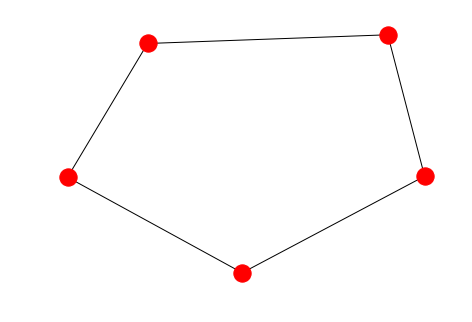

In [33]:
#(i)  Like a regular graph/jellyfish/A regular graph is simply one where each node has the same degree.
#And a graph in Jellyfish is one where the switches in the topology are the nodes.

import networkx as nx
import matplotlib.pyplot as plt
   
switches = 5
degree = 2
jelly = nx.random_regular_graph(d=degree, n=switches,seed=123)
A_jelly = nx.to_numpy_matrix(jelly)


nx.draw(jelly)
plt.show()    



In [12]:
A_jelly

matrix([[0., 1., 0., 0., 1.],
        [1., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0.],
        [0., 0., 1., 0., 1.],
        [1., 0., 0., 1., 0.]])

In [9]:
#1.Identify the nodes which have no links to other nodes
#DONT USE
def mat(matrix):
    l=[]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i,j] == 0 and i!=j:
                    l.append((i,j))    
    return(l)
                
mat(A_jelly)

[(0, 2),
 (0, 3),
 (1, 3),
 (1, 4),
 (2, 0),
 (2, 4),
 (3, 0),
 (3, 1),
 (4, 1),
 (4, 2)]

In [10]:
##### Returns a random pair of nodes that are not connected with an edge (not neighbours)
###Adds an edge to the nodes qhich hasnt an edge before
#### By firstly picking any node uniformly at random.

import numpy as np 
from random import choice



def check_con (graph,swithces):
    l=[]
    for node in graph.nodes():
        #select 2 pair of nodes uniformly
        node1 = np.random.choice(graph.nodes())  
        node2 = np.random.choice(graph.nodes())
        #print(node1,node2)
        # if there is an edge betweeen them or it happened to coose the same node pick again!
        while graph.has_edge(node1,node2) or node1==node2:
            node1 = np.random.choice(graph.nodes())
            node2 = np.random.choice(graph.nodes())   
        l.append((node1,node2))        
        graph.add_edge(node1,node2)
        #If a switch has ≥ 2 free ports left, say (p1, p2), choose a random link (x, y)
        # remove it and replace it with (p1, x) and (p2, y).
    if (len(graph.edges()) + 2) <= ((switches * (switches - 1)) / 2 :
        link = np.random.choice(graph.edges())  
        rem_link = graph.remove_edge(link)
###Dont know how to proceed
        
    return(l)     
            
check_con(jelly)


[(2, 0), (2, 1), (0, 3), (4, 3), (1, 4)]

TypeError: has_edge() missing 2 required positional arguments: 'u' and 'v'

0.0

In [28]:
jelly.edges()

[(1, 2),
 (1, 7),
 (2, 3),
 (4, 10),
 (4, 6),
 (10, 8),
 (9, 13),
 (9, 12),
 (13, 5),
 (6, 11),
 (11, 14),
 (5, 12),
 (0, 7),
 (0, 8),
 (3, 14)]

In [32]:
15 * 14

210

In [86]:
jelly.has_edge(0,1)

True

In [31]:
len(jelly.edges())

15

Reliability performance

Assume a link can break down (fail) with probability
q
.

Plot
TH
as a function of
q
for 0
<
q
≤
0
.
25, for the two
network models in point 1) above with
n
= 100.